In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("joboffer.xlsx",header=0)

In [3]:
data.shape


(1593, 5)

In [4]:
data.columns

Index(['Unnamed: 0', 'job_title', 'skill_required', 'location', 'link'], dtype='object')

In [5]:
#There is an unnamed column and we cannot use this for data analysis.So we drop that column.
# make a new dataframe because if you have same name and implement this kernel twice,it will drop the 0th column everytime
df=data.drop(['Unnamed: 0'],axis=1)

In [6]:
df.head()

,job_title,skill_required,location,link
0,DevSecOps,"software engineering, data development solutio...",SANTANDERTECHHUB-PROFILES,2022-11-11 Job description junior positions-pa...
1,Technology Talent,Broad spectrum technologies (including Blockch...,"Poland, Portugal, Spain, UK, Mexico, Brazil an...",2022-11-11 Job description junior positions-pa...
2,DevSecOps Engineer,"Collaboration, architecture, design, deploymen...",SANTANDERTECHHUB,2022-11-11 Job description junior positions-pa...
3,New technologies specialist,"Kafka, Java8 (JDK11/17), Spring Cloud Stream, ...",Not specified,2022-11-11 Job description junior positions-pa...
4,Data Management Solution Delivery,Cloudera/Spark/SnowFlake/Databricks/Stratio/Hi...,SantanderTechHub,2022-11-11 Job description junior positions-pa...


In [7]:
df.tail()

,job_title,skill_required,location,link
1588,Développement outil monitoring risques,"implémentation chatbot intelligent, outil préd...",NaN,Value-page8.pdf
1589,utilisant différentes données textuelles colle...,Les techniques de webscrapping ou/et parsing d...,NaN,Value-page8.pdf
1590,Réflexion stratégique cadre conception platefo...,NaN,NaN,Value-page8.pdf
1591,Evaluation bilan carbone d'une entreprise,"méthodologie, questionnaire (questions clés)",NaN,Value-page8.pdf
1592,Conception pilote et tokenisation crédit carbo...,NaN,VALUE,Value-page8.pdf


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       1572 non-null   object
 1   skill_required  1398 non-null   object
 2   location        1179 non-null   object
 3   link            1593 non-null   object
dtypes: object(4)
memory usage: 49.9+ KB


In [9]:
df.describe()

,job_title,skill_required,location,link
count,1572,1398,1179,1593
unique,1300,1174,447,597
top,Not specified,Not specified,France,EY-page5.pdf
freq,20,38,88,26


<AxesSubplot:ylabel='None'>

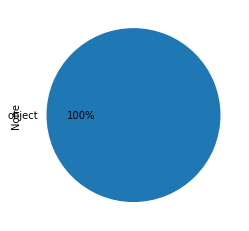

In [10]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')


In [11]:
df.duplicated().values.any()

True

In [12]:
duplicate_rows = df[df.duplicated()]

print('Number of duplicate rows:', duplicate_rows.shape[0])

Number of duplicate rows: 14


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().values.any()

False

In [15]:
# ### To find the anomolities in data
# for i in df.columns:
#     print('*'*20,i,'*'*20)
#     print(df[i].unique())

In [16]:
# Vérifier les valeurs manquantes
df.isnull().sum()

job_title          21
skill_required    195
location          414
link                0
dtype: int64

In [17]:
#nb de valeurs manquantes
str(df.isna().sum().sum())#total

'630'

In [18]:
#afficher la liste de pourcentage des valeurs manquantes pour chaque colonne triée par ordre décroissante
(df.isna().sum()/df.shape[0]).sort_values()

link              0.000000
job_title         0.013300
skill_required    0.123496
location          0.262191
dtype: float64

In [19]:
df.replace(to_replace = {'Unknown':np.nan,'not specified':np.nan,'Not mentioned':np.nan,'N/A':np.nan,'Non spécifié':np.nan,'Not specified':np.nan,'None':np.nan,'Undefined':np.nan,'Unspecified':np.nan,'ASAP':np.nan,'Nombre stagiaire':np.nan,'6 mois':np.nan,'5-6':np.nan,'[]':np.nan},inplace=True)

In [20]:
df=df.drop(df[df['skill_required']=='-'].index)
df=df.drop(df[df['job_title']=='1'].index)
df=df.drop(df[df['skill_required']=='1'].index)
df=df.drop(df[df['job_title']=='-'].index)



In [21]:
df['job_title'].fillna(np.nan, inplace=True)
df['skill_required'].fillna(np.nan, inplace=True)
df['location'].fillna(np.nan, inplace=True)

In [22]:
str(df.isna().sum().sum())#total

'893'

In [23]:
df.head()

,job_title,skill_required,location,link
0,DevSecOps,"software engineering, data development solutio...",SANTANDERTECHHUB-PROFILES,2022-11-11 Job description junior positions-pa...
1,Technology Talent,Broad spectrum technologies (including Blockch...,"Poland, Portugal, Spain, UK, Mexico, Brazil an...",2022-11-11 Job description junior positions-pa...
2,DevSecOps Engineer,"Collaboration, architecture, design, deploymen...",SANTANDERTECHHUB,2022-11-11 Job description junior positions-pa...
3,New technologies specialist,"Kafka, Java8 (JDK11/17), Spring Cloud Stream, ...",NaN,2022-11-11 Job description junior positions-pa...
4,Data Management Solution Delivery,Cloudera/Spark/SnowFlake/Databricks/Stratio/Hi...,SantanderTechHub,2022-11-11 Job description junior positions-pa...


In [24]:
df.isnull().sum()

job_title          29
skill_required    277
location          587
link                0
dtype: int64

In [25]:
# skill_counts = df['skill_required'].str.get_dummies(sep=',').sum()

# for skill in skill_counts.index:
#     df[skill + '_count'] = df['skill_required'].str.contains(skill).astype(int)


In [26]:
df[df['job_title'].isnull()]

,job_title,skill_required,location,link
21,NaN,COMPRENDRE LES NOTIONS THEORIQUES DE BASE LINUX,ARIANA,ACTIA-page11.pdf
22,NaN,REDIGER UN DOCUMENT DE CONCEPTION,ARIANA,ACTIA-page11.pdf
23,NaN,DEVELOPPER DES TASKS RTOS POUR CONTROLER UN FL...,ARIANA,ACTIA-page11.pdf
25,NaN,TESTER ET VALIDER LES RÉSULTATS OBTENUS,ARIANA,ACTIA-page11.pdf
26,NaN,MATÉRIELS: EVALBOARD IMX6,ARIANA,ACTIA-page11.pdf
27,NaN,LANGAGES DE PROGRAMMATION: C/C++,ARIANA,ACTIA-page11.pdf
28,NaN,"ATELIER/OUTILS DE DÉVELOPPEMENT: VSCODE, UBUNTU",ARIANA,ACTIA-page11.pdf
122,NaN,NaN,NaN,AIVENTU-page1.pdf
152,NaN,Issu d'une formation d'école d'ingénieurs,NaN,AS2E AUTOMATION-page10.pdf
153,NaN,Solides compétences mécatronique,NaN,AS2E AUTOMATION-page10.pdf


In [27]:
df=df.dropna(subset=['job_title'])

In [28]:
df[df['job_title'].isnull()]


,job_title,skill_required,location,link


In [29]:
df[df['skill_required'].isnull()]

,job_title,skill_required,location,link
14,Disponibilidad viajes puntuales,NaN,NaN,2022-page3.pdf
29,DESCRIPTION PFE-8,NaN,ARIANA,ACTIA-page11.pdf
64,Quisommes-nous?,NaN,NaN,Addin-page1.pdf
65,Commentpostuler?,NaN,NaN,Addin-page1.pdf
66,Listeprojets,NaN,NaN,Addin-page1.pdf
...,...,...,...,...
1572,Heureux élus,NaN,NaN,Value-page5.pdf
1573,Célébrons ensemble votre première journée chez...,NaN,NaN,Value-page5.pdf
1582,Refactoring d'une solution intelligente desk t...,NaN,PFE-07,Value-page7.pdf
1590,Réflexion stratégique cadre conception platefo...,NaN,NaN,Value-page8.pdf


In [30]:
df=df.dropna(subset=['skill_required'])

In [31]:
str(df['skill_required'].isna().sum())

'0'

In [32]:
from googletrans import Translator

translator = Translator()



# create a function to translate a single string value
def translate_text(text):
    translation = translator.translate(text)
    return translation.text

# apply the translation function to all cells of the dataframe
df.iloc[:, :-1] = df.iloc[:, :-1].applymap(lambda x: translate_text(x))

# display the translated dataframe
print(df)

                                   job_title  \
0                                  DevSecOps   
1                          Technology Talent   
2                         DevSecOps Engineer   
3                New technologies specialist   
4          Data Management Solution Delivery   
...                                      ...   
1586            Analysis of application logs   
1587              Build a reference database   
1588     Development of risk monitoring tool   
1589  using different collected textual data   
1591          Carbon assessment of a company   

                                         skill_required  \
0     software engineering, data development solutio...   
1     Broad spectrum technologies (including Blockch...   
2     Collaboration, architecture, design, deploymen...   
3     Kafka, Java8 (JDK11/17), Spring Cloud Stream, ...   
4     Cloudera/Spark/SnowFlake/Databricks/Stratio/Hi...   
...                                                 ...   
1586  to i

In [34]:
df.to_excel("df_noNA.xlsx")


In [35]:
df.shape

(1274, 4)

In [ ]:
import plotly.graph_objects as go
desc_count1 = df['location'].value_counts().reset_index().rename(columns={'index':'index','location':'count'})
fig = go.Figure(go.Bar(
    x = desc_count1['index'],y = desc_count1['count'],text=desc_count1['count'],marker={'color': desc_count1['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of locations	',xaxis_title="	location	 status",yaxis_title="Number of count")
fig.show()